# hposuite Plotting and Comparison

## Loading and printing available Benchmarks and Optimizers in hposuite

In [2]:
from hposuite.benchmarks import BENCHMARKS
from hposuite.optimizers import OPTIMIZERS

print(BENCHMARKS.keys())
print(OPTIMIZERS.keys())

dict_keys(['yahpo-lcbench-3945', 'yahpo-lcbench-7593', 'yahpo-lcbench-34539', 'yahpo-lcbench-126025', 'yahpo-lcbench-126026', 'yahpo-lcbench-126029', 'yahpo-lcbench-146212', 'yahpo-lcbench-167104', 'yahpo-lcbench-167149', 'yahpo-lcbench-167152', 'yahpo-lcbench-167161', 'yahpo-lcbench-167168', 'yahpo-lcbench-167181', 'yahpo-lcbench-167184', 'yahpo-lcbench-167185', 'yahpo-lcbench-167190', 'yahpo-lcbench-167200', 'yahpo-lcbench-167201', 'yahpo-lcbench-168329', 'yahpo-lcbench-168330', 'yahpo-lcbench-168331', 'yahpo-lcbench-168335', 'yahpo-lcbench-168868', 'yahpo-lcbench-168908', 'yahpo-lcbench-168910', 'yahpo-lcbench-189354', 'yahpo-lcbench-189862', 'yahpo-lcbench-189865', 'yahpo-lcbench-189866', 'yahpo-lcbench-189873', 'yahpo-lcbench-189905', 'yahpo-lcbench-189906', 'yahpo-lcbench-189908', 'yahpo-lcbench-189909', 'mfh3_bad', 'mfh6_bad', 'mfh3_good', 'mfh6_good', 'mfh3_moderate', 'mfh6_moderate', 'mfh3_terrible', 'mfh6_terrible', 'pd1-cifar100-wide_resnet-2048', 'pd1-imagenet-resnet-512', 

## Comparing RandomSearch and RandomSearchWithPriors on Ackley Functional Benchmark

In [10]:
from hposuite import create_study

ackley = BENCHMARKS["ackley"]

study = create_study(
    name="ex-rs-comp",
    output_dir="example-outputs",
    optimizers=[
        "RandomSearch",
        "RandomSearchWithPriors",
    ],
    benchmarks=(
        "ackley",
        {
            "priors": {
                "y": ackley.desc.predefined_points["min"]
            }
        }
    ),
    num_seeds=5,
    budget=1000,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 10 runs
INFO:hposuite.study:Created study at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp
INFO:hposuite.study:Dumped experiments to /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 10 experiments sequentially
INFO:hposuite.study:Running experiment 1/10
INFO:hposuite.run:Overwriting optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/optimizer=RandomSearch.benchma

#### Plotting the results

In [5]:
!python -m hposuite.plotting.utils --study_dir ex-rs-comp --output_dir example-outputs --figsize 10 5 --logscale

DEBUG:matplotlib:matplotlib data path: /home/soham/repos/envs/hposuite_env/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/soham/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/soham/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/soham/.cache/matplotlib/fontlist-v390.json
INFO:__main__:Found benchmarks: ['ackley']
INFO:__main__:Plotting RandomSearch_default
INFO:__main__:Plotting RandomSearchWithPriors_default
INFO:__main__:Saved plot to /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/plots/ackley_performance.png


#### Displaying the results

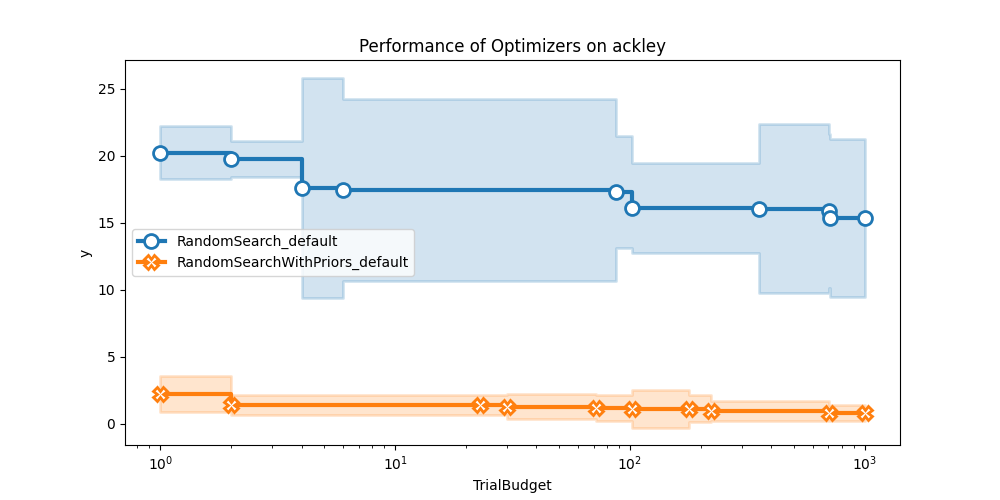

In [6]:
from IPython.display import Image

Image(filename="example-outputs/ex-rs-comp/plots/ackley_performance.png")

## Comparing the effect of Continuations using a Multi-fidelity Optimizer

For this example we use the SMAC Hyperband on the PD1 Cifar100 Wide Resnet 2048 Benchmark \
In hposuite, continuations is set to True by default for each run, unless the optimizer doesn't support it. In that case, it automatically gets set to False.

#### Creating and Running the Study

In [5]:
from hposuite import create_study

study = create_study(
    name="continuations-comp",
    output_dir="example-outputs",
    optimizers="DEHB",
    benchmarks=(
        "pd1-cifar100-wide_resnet-2048",
        {
            "objectives": "valid_error_rate"
        }
    ),
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 5 runs
INFO:hposuite.study:Created study at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp
INFO:hposuite.study:Dumped experiments to /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 5 experiments sequentially
INFO:hposuite.study:Running experiment 1/5
INFO:hposuite.run:Overwriting optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.TrialBudget=100.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.TrialBudget=100.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.TrialBudget=100.seed=383329928
INFO:hposuite.run:Res

#### Plotting the Results

In [13]:
!python -m hposuite.plotting.utils --study_dir continuations-comp --output_dir example-outputs --figsize 12 7

DEBUG:matplotlib:matplotlib data path: /home/soham/repos/envs/hposuite_env/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/soham/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/soham/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/soham/.cache/matplotlib/fontlist-v390.json
INFO:__main__:Found benchmarks: ['pd1-cifar100-wide_resnet-2048']
INFO:__main__:Plotting DEHB_default
INFO:__main__:Saved plot to /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/plots/pd1-cifar100-wide_resnet-2048_performance.png


#### Displaying the Results

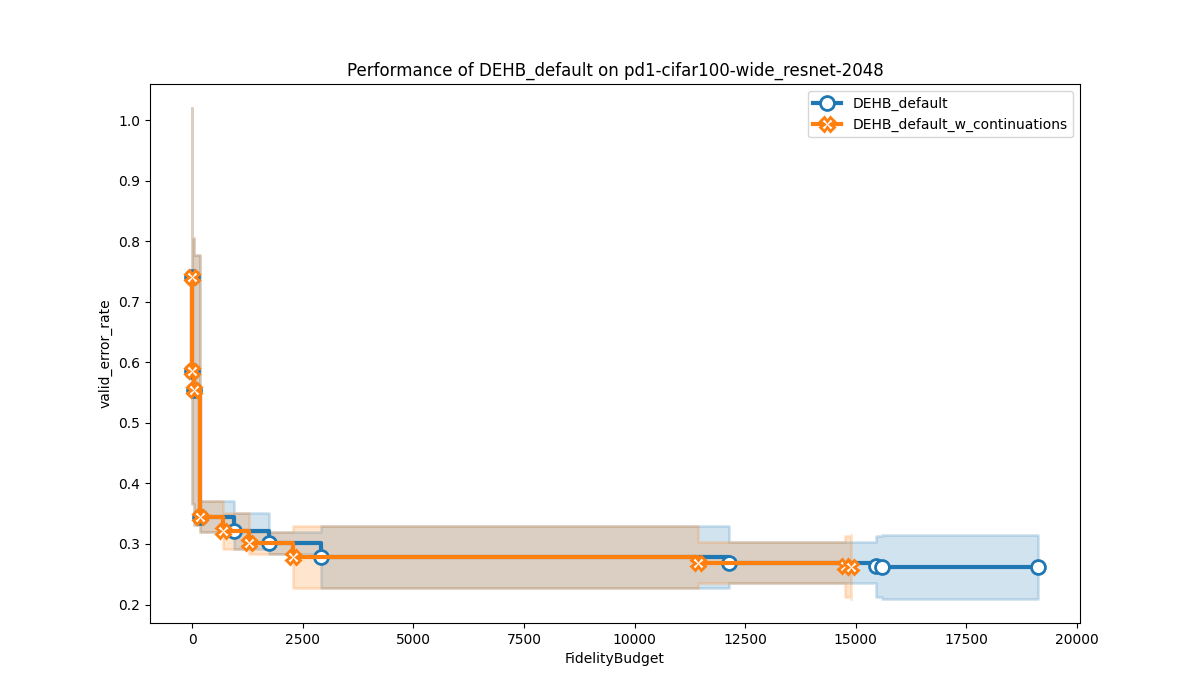

In [14]:
from IPython.display import Image

Image(filename="example-outputs/continuations-comp/plots/pd1-cifar100-wide_resnet-2048_performance.png")